# 🏦 Bank Customer Churn Prediction

Bu projede, bankacılık sektöründe müşterilerin davranışlarını analiz ederek **müşteri terk riski (churn)** tahmin edilmeye çalışılmıştır.

Veri kümesi Kaggle üzerinden sağlanmış olup, 10.000'den fazla müşteriye ait demografik, finansal ve davranışsal özellikleri içermektedir.

### 🎯 Hedef:
- Müşterinin bankadan ayrılıp ayrılmayacağını tahmin eden bir **makine öğrenmesi modeli** geliştirmek.
- En iyi performans veren modeli seçip yorumlamak.



In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 📦 Veri Seti Bilgileri

Veri kümesi 10.000'den fazla müşteri verisini içeriyor. Bu veriler demografik, finansal ve hizmet kullanımı gibi bilgileri kapsamaktadır.


In [25]:
df = pd.read_csv('/kaggle/input/predicting-churn-for-bank-customers/Churn_Modelling.csv', delimiter=',')
df.shape

(10000, 14)

In [26]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [28]:
df. describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 📊 Churn Dağılımı

Veri setindeki `Exited` değişkeni, müşterinin bankadan ayrılıp ayrılmadığını belirtir. Bu sınıfın dağılımı aşağıda gösterilmiştir.


<Axes: xlabel='Exited'>

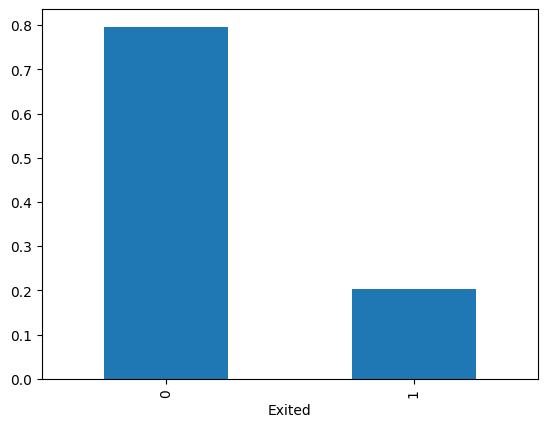

In [29]:
df['Exited'].value_counts(normalize=True).plot(kind='bar')

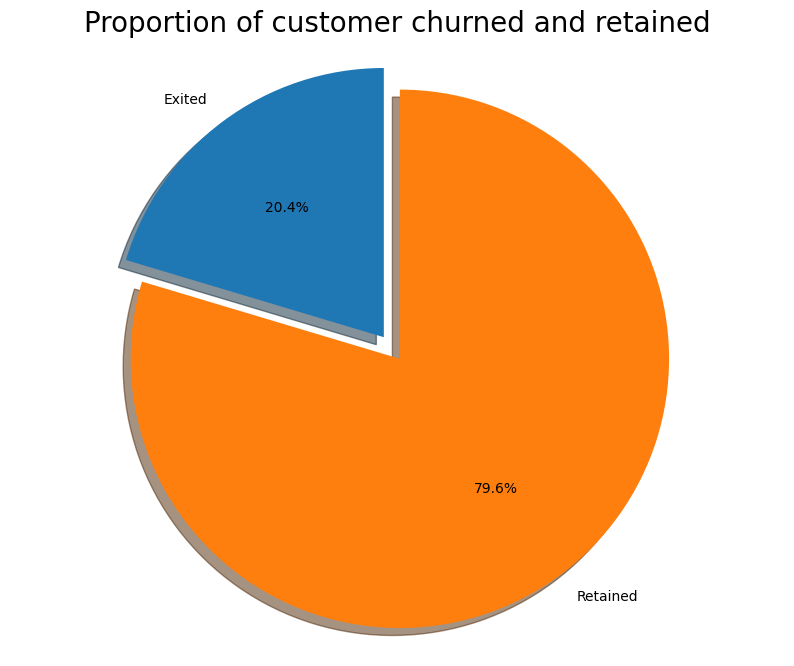

In [30]:
labels = 'Exited', 'Retained'
sizes = [df. Exited[df['Exited'] == 1].count(), df.Exited[df['Exited']==0].count()]
explode =(0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

## 🔍 Exploratory Data Analysis (EDA)

Aşağıdaki görselleştirmelerle veri seti genel olarak analiz edilmiştir:

- `Exited` sütunu ile churn oranı gözlemlenmiştir.
- `Geography`, `Gender`, `IsActiveMember`, `HasCrCard` gibi değişkenlerle churn ilişkisi incelenmiştir.
- Korelasyon ısı haritası ile sayısal değişkenlerin `Exited` ile ilişkileri ortaya konmuştur.


<Axes: xlabel='IsActiveMember', ylabel='count'>

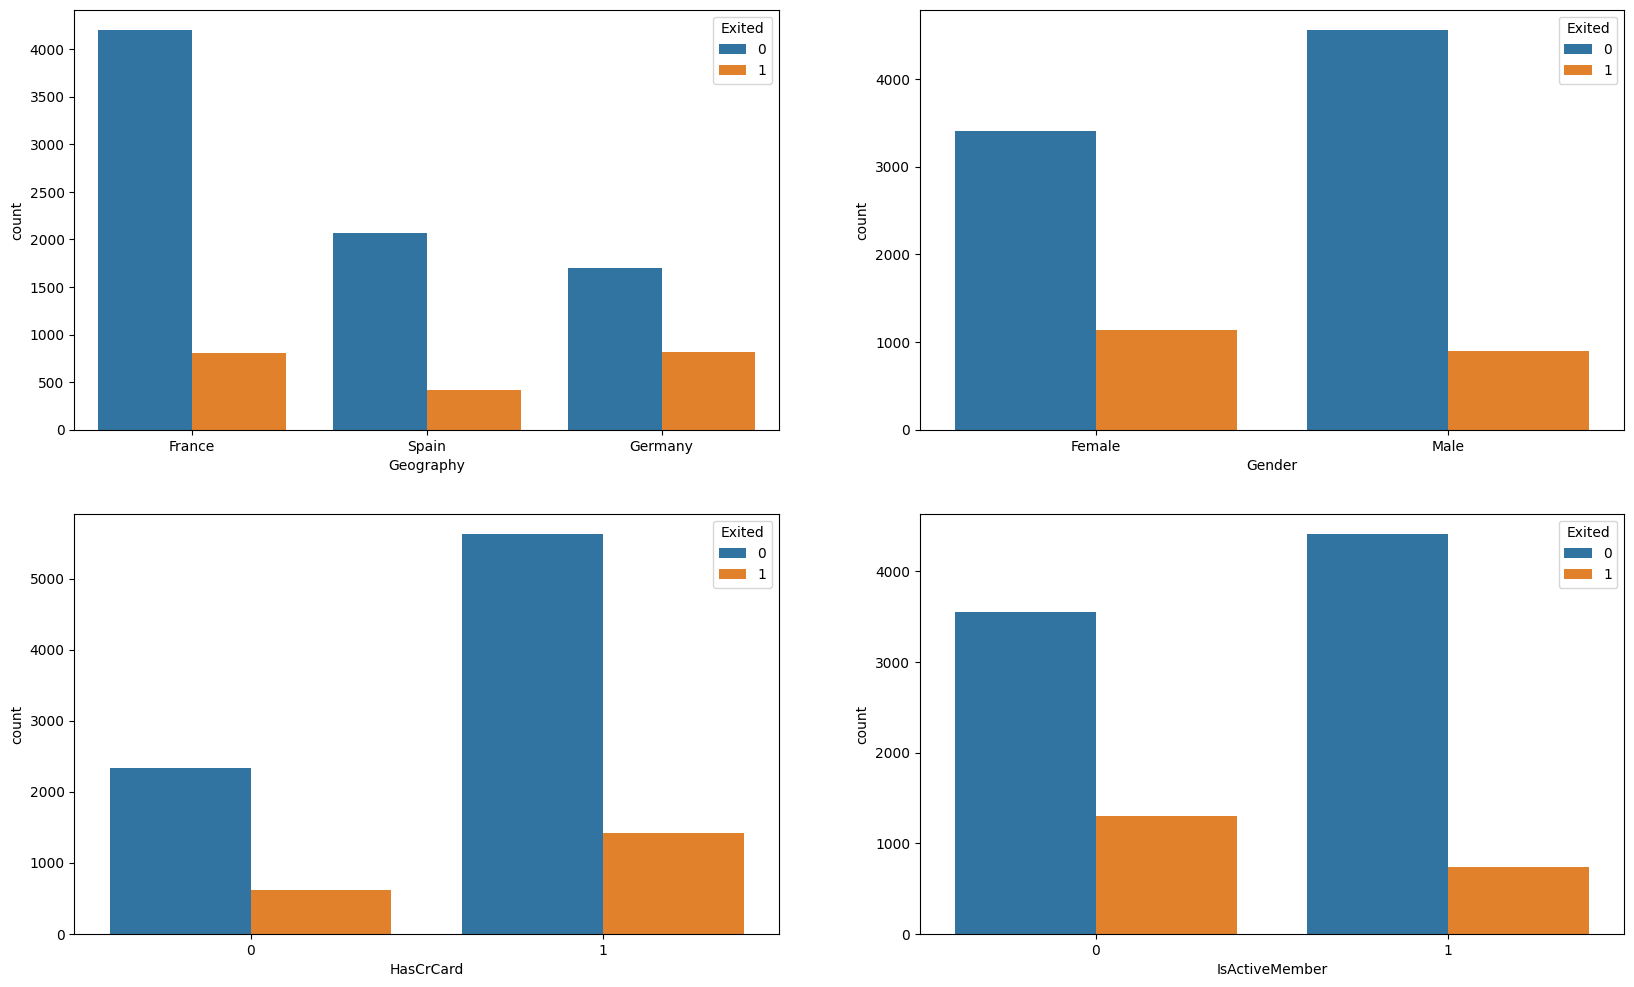

In [31]:
df_eda = df.copy()

fig, axarr = plt.subplots(2, 2, figsize=(20,12))
sns.countplot(x='Geography', hue ='Exited', data = df_eda, ax=axarr[0][0])
sns.countplot(x='Gender', hue ='Exited', data = df_eda, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue ='Exited', data = df_eda, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue ='Exited', data = df_eda, ax=axarr[1][1])

### 🔗 Korelasyon Analizi

Sayısal sütunlar arasındaki ilişkiler incelenerek churn üzerinde etkili olan faktörler ortaya konmuştur.


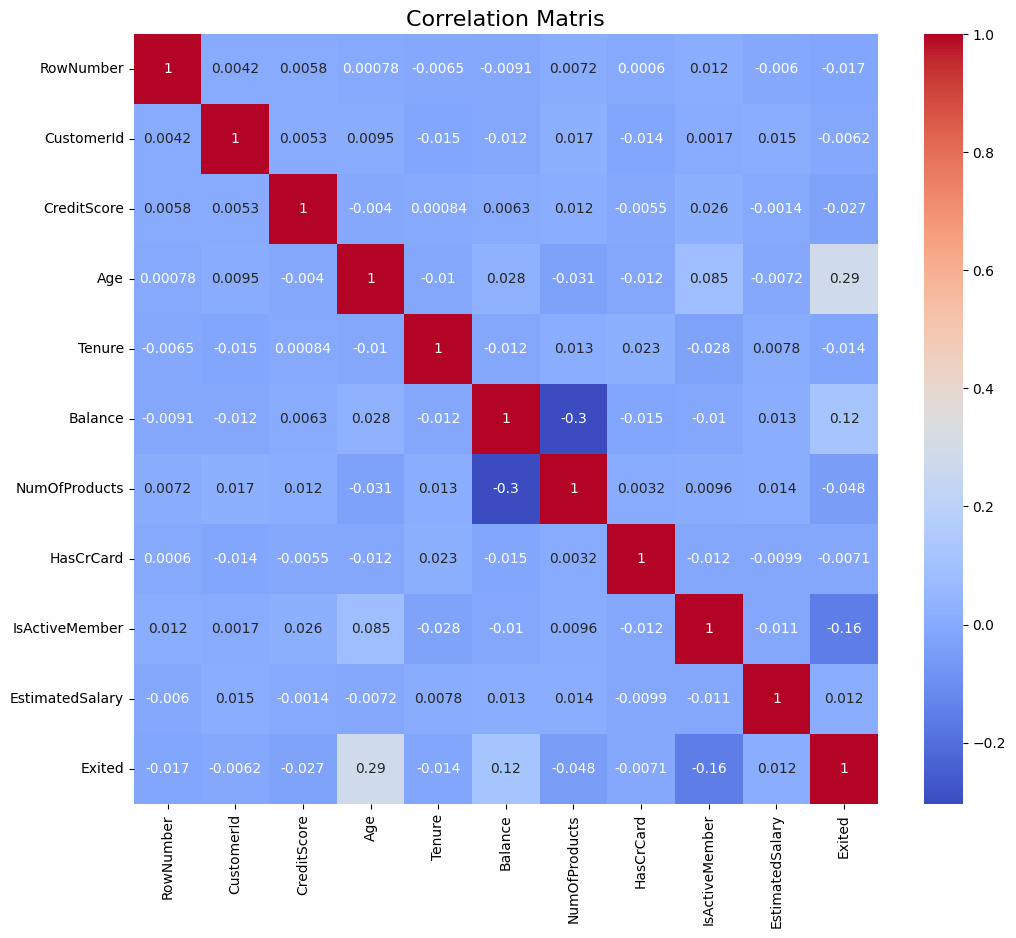

In [32]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matris', fontsize=16)
plt.show()

In [33]:
numeric_df.corr()['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

## 🛠️ Veri Ön İşleme
- `RowNumber`, `CustomerId`, `Surname` gibi model açısından anlamsız sütunlar kaldırılmıştır.
- Kategorik veriler (`Geography`, `Gender`) **one-hot encoding** ile sayısal hale getirilmiştir.
- Özellikler (`X`) ve hedef (`y`) ayrıldıktan sonra **StandardScaler** ile ölçekleme yapılmıştır.


In [34]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [35]:
numeric_df.corr()['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [36]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [37]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### 🤖 Modelleme: Logistic Regression, Random Forest, XGBoost

Farklı algoritmalar eğitilerek performansları karşılaştırıldı. Aşağıda her bir model için değerlendirme metrikleri sunulmuştur.


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
# Modeli oluştur
log_reg = LogisticRegression(max_iter=1000)

# Eğit
log_reg.fit(X_train, y_train)

# Tahmin yap
y_pred = log_reg.predict(X_test)

In [41]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8080
Confusion Matrix:
[[1540   53]
 [ 331   76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



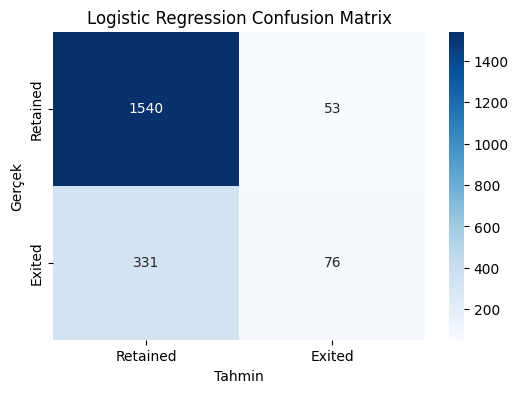

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Retained', 'Exited'], yticklabels=['Retained', 'Exited'])
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confussion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

Confussion Matrix:
[[1541   52]
 [ 219  188]]


In [44]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.70      0.49      0.58       407

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



### 📈 Model Performans Karşılaştırması

| **Model**             | **Accuracy** | **Recall (Churn)** | **Precision (Churn)** | **F1 Score (Churn)** |
|-----------------------|--------------|---------------------|------------------------|------------------------|
| Logistic Regression   | 0.808        | 0.19                | 0.59                   | 0.28                   |
| Random Forest         | 0.860        | 0.46                | 0.78                   | 0.58                   |
| **XGBoost (Final)**   | 0.850        | **0.49**            | **0.70**               | **0.58**               |


### 💡 XGBoost Feature Importance

Modelin en önemli gördüğü değişkenler görselleştirilmiştir. Özellikle yaş, aktif üyelik durumu ve ülke etkili faktörler arasında yer almaktadır.


<Figure size 1000x600 with 0 Axes>

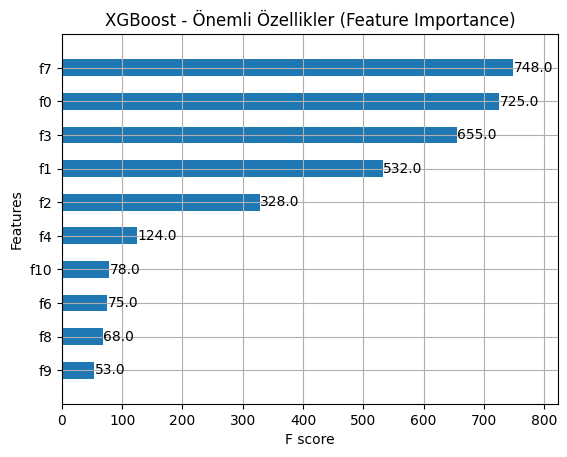

In [45]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_importance(xgb, importance_type='weight', max_num_features=10, height=0.5)
plt.title("XGBoost - Önemli Özellikler (Feature Importance)")
plt.show()

### 📐 ROC Curve – XGBoost

Modelin pozitif sınıfı (churn) ne kadar iyi ayırt ettiğini gösteren ROC eğrisi ve AUC skoru aşağıda sunulmuştur.


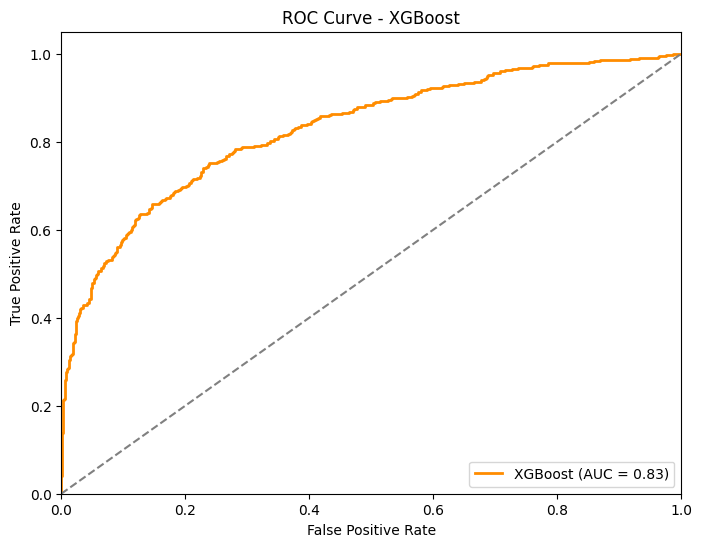

In [46]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_proba = xgb.predict_proba(X_test)[:, 1]  # churn olma olasılığı

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

### ✅ Sonuç ve Değerlendirme

XGBoost modeli, yüksek doğruluk oranı, dengeli F1 skoru ve daha yüksek recall ile final model olarak seçilmiştir.

Bu model, bankaların churn riski taşıyan müşterilerini önceden belirleyerek stratejik aksiyonlar almasına katkı sağlayabilir.
